# Importing data

In [1]:
import pandas as pd 
train = pd.read_csv("train2.csv")
test = pd.read_csv("test2.csv")

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understanding and visualizing data

# 1.NaN values:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train.isnull().sum() #almost %70 percent of cabin data is missing so i will drop it

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train = train.drop(["Cabin"],axis=1)
test = test.drop(["Cabin"],axis=1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

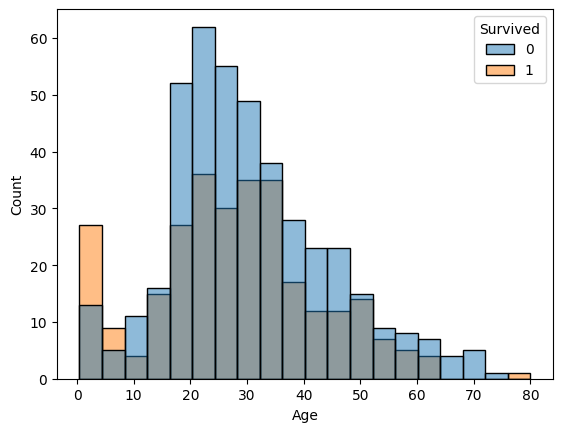

In [7]:
sns.histplot(x=train.Age,hue=train.Survived) #kids tend to survive more

In [8]:
train["Age"] = train["Age"].fillna(int(train["Age"].mean()))
test["Age"] = test["Age"].fillna(int(test["Age"].mean()))

In [9]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

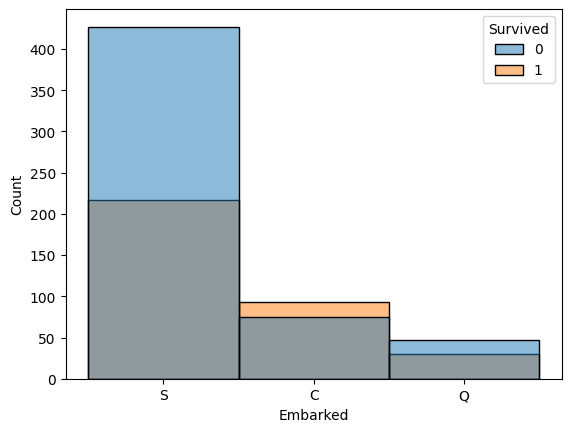

In [11]:
sns.histplot(train,x="Embarked",hue="Survived") #en çok s var 2 boşluğu s ile dolduracağım. C yaşamaya daha meyilli

In [12]:
train["Embarked"] = train["Embarked"].fillna("S")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

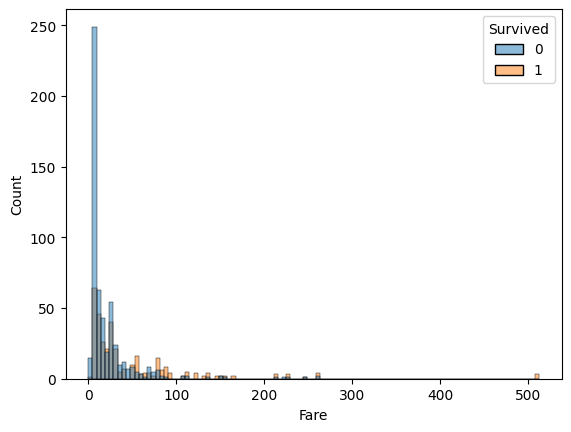

In [13]:
sns.histplot(x=train.Fare,hue=train.Survived) #higher values tends to survive

In [14]:
train["Fare"].mean(),test["Fare"].mean()

(32.204207968574636, 35.627188489208635)

In [15]:
test["Fare"] = test["Fare"].fillna(int(35.6271))

In [16]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Count'>

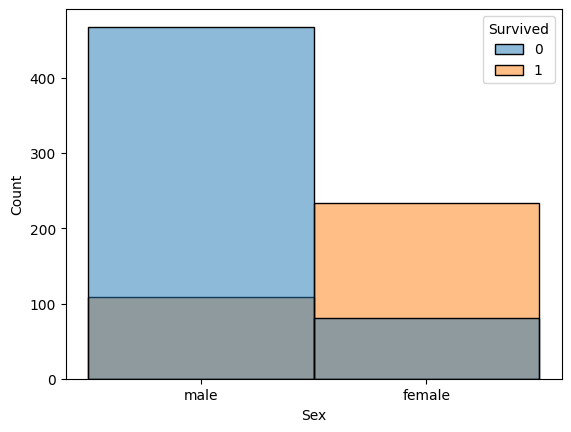

In [18]:
sns.histplot(train,x="Sex",hue="Survived") #female are tend to survive more

# 2.Numeric classification

In [19]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
train_embarked_dummies = pd.get_dummies(train["Embarked"])

In [21]:
test_embarked_dummies = pd.get_dummies(test["Embarked"])

In [22]:
train_embarked_dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [23]:
train = train.drop(["Embarked"],axis=1)
test = test.drop(["Embarked"],axis=1)

In [24]:
train = pd.concat([train,train_embarked_dummies],axis="columns")
test = pd.concat([test,test_embarked_dummies],axis="columns")

In [25]:
train #embarked olmuş, şimdi sex'i düzenleyelim.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,0,0


In [26]:
datamapping_sex = {"female":1,"male":0}
train["Sex"] = train["Sex"].map(datamapping_sex)
test["Sex"] = test["Sex"].map(datamapping_sex)

In [27]:
train #sex de numeric'e dönüştü 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,0,0


In [28]:
train["Ticket"].unique() #bibok anlamadım bunu sınıflandırmamam şuan bunu çıkartıyorum ikisinden

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [29]:
train = train.drop(["Ticket"],axis=1)
test = test.drop(["Ticket"],axis=1)

In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,1,0,0


ben olsam name deki title'ları çekip önemine bir bakardım ama kendim yapamadım ve örneğini de bulaamdım o yüzden çıkaracağım:(


In [31]:
train = train.drop(["Name"],axis=1)
test = test.drop(["Name"],axis=1)

In [32]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,1,29.0,1,2,23.4500,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,0


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   C            891 non-null    uint8  
 9   Q            891 non-null    uint8  
 10  S            891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


fare'i yuvarlayıp int değere çevirelim.

In [34]:
train["Fare"].round()
train["Fare"] = train["Fare"].astype("int")
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7,0,0,1
1,2,1,1,1,38.0,1,0,71,1,0,0
2,3,1,3,1,26.0,0,0,7,0,0,1
3,4,1,1,1,35.0,1,0,53,0,0,1
4,5,0,3,0,35.0,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13,0,0,1
887,888,1,1,1,19.0,0,0,30,0,0,1
888,889,0,3,1,29.0,1,2,23,0,0,1
889,890,1,1,0,26.0,0,0,30,1,0,0


In [35]:
test["Fare"].round()
test["Fare"] = test["Fare"].astype("int")
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,0,34.5,0,0,7,0,1,0
1,893,3,1,47.0,1,0,7,0,0,1
2,894,2,0,62.0,0,0,9,0,1,0
3,895,3,0,27.0,0,0,8,0,0,1
4,896,3,1,22.0,1,1,12,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8,0,0,1
414,1306,1,1,39.0,0,0,108,1,0,0
415,1307,3,0,38.5,0,0,7,0,0,1
416,1308,3,0,30.0,0,0,8,0,0,1


# displaying all graphs on subplots:

<AxesSubplot:xlabel='Parch', ylabel='count'>

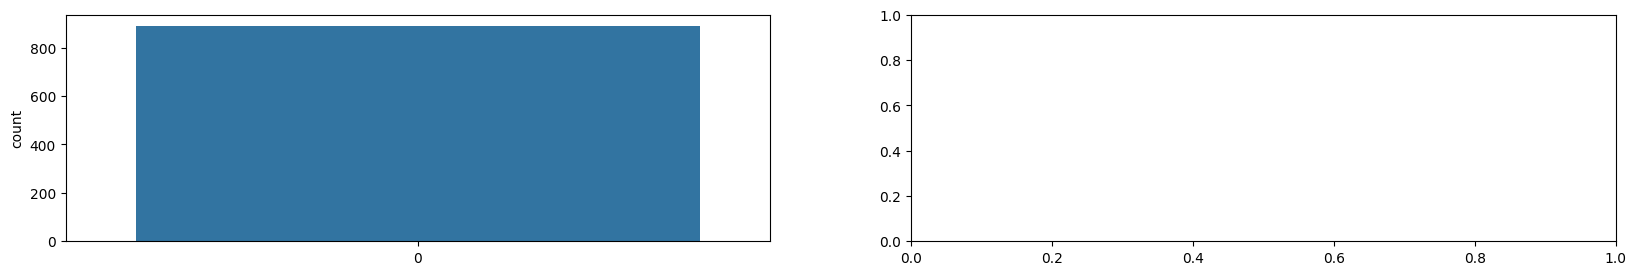

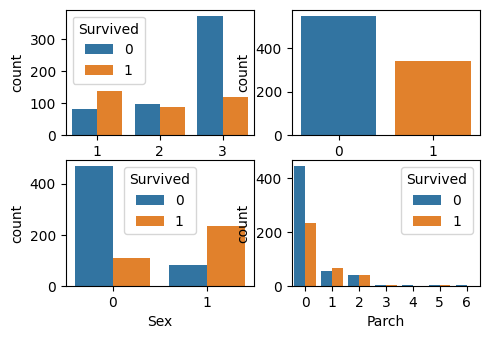

In [36]:
plt.figure(1,figsize=(20,10))

plt.subplot(3,2,1)
sns.countplot(train["Sex"])
plt.subplot(3,2,2)
sns.displot(train["Age"])
plt.subplot(3,2,3)
sns.countplot(x=train["Pclass"],hue=train["Survived"])
plt.subplot(3,2,4)
sns.countplot(x=train["Survived"])
plt.subplot(3,2,5)
sns.countplot(x=train['Sex'],hue=train['Survived'])
plt.subplot(3,2,6)
sns.countplot(x=train["Parch"],hue=train["Survived"])


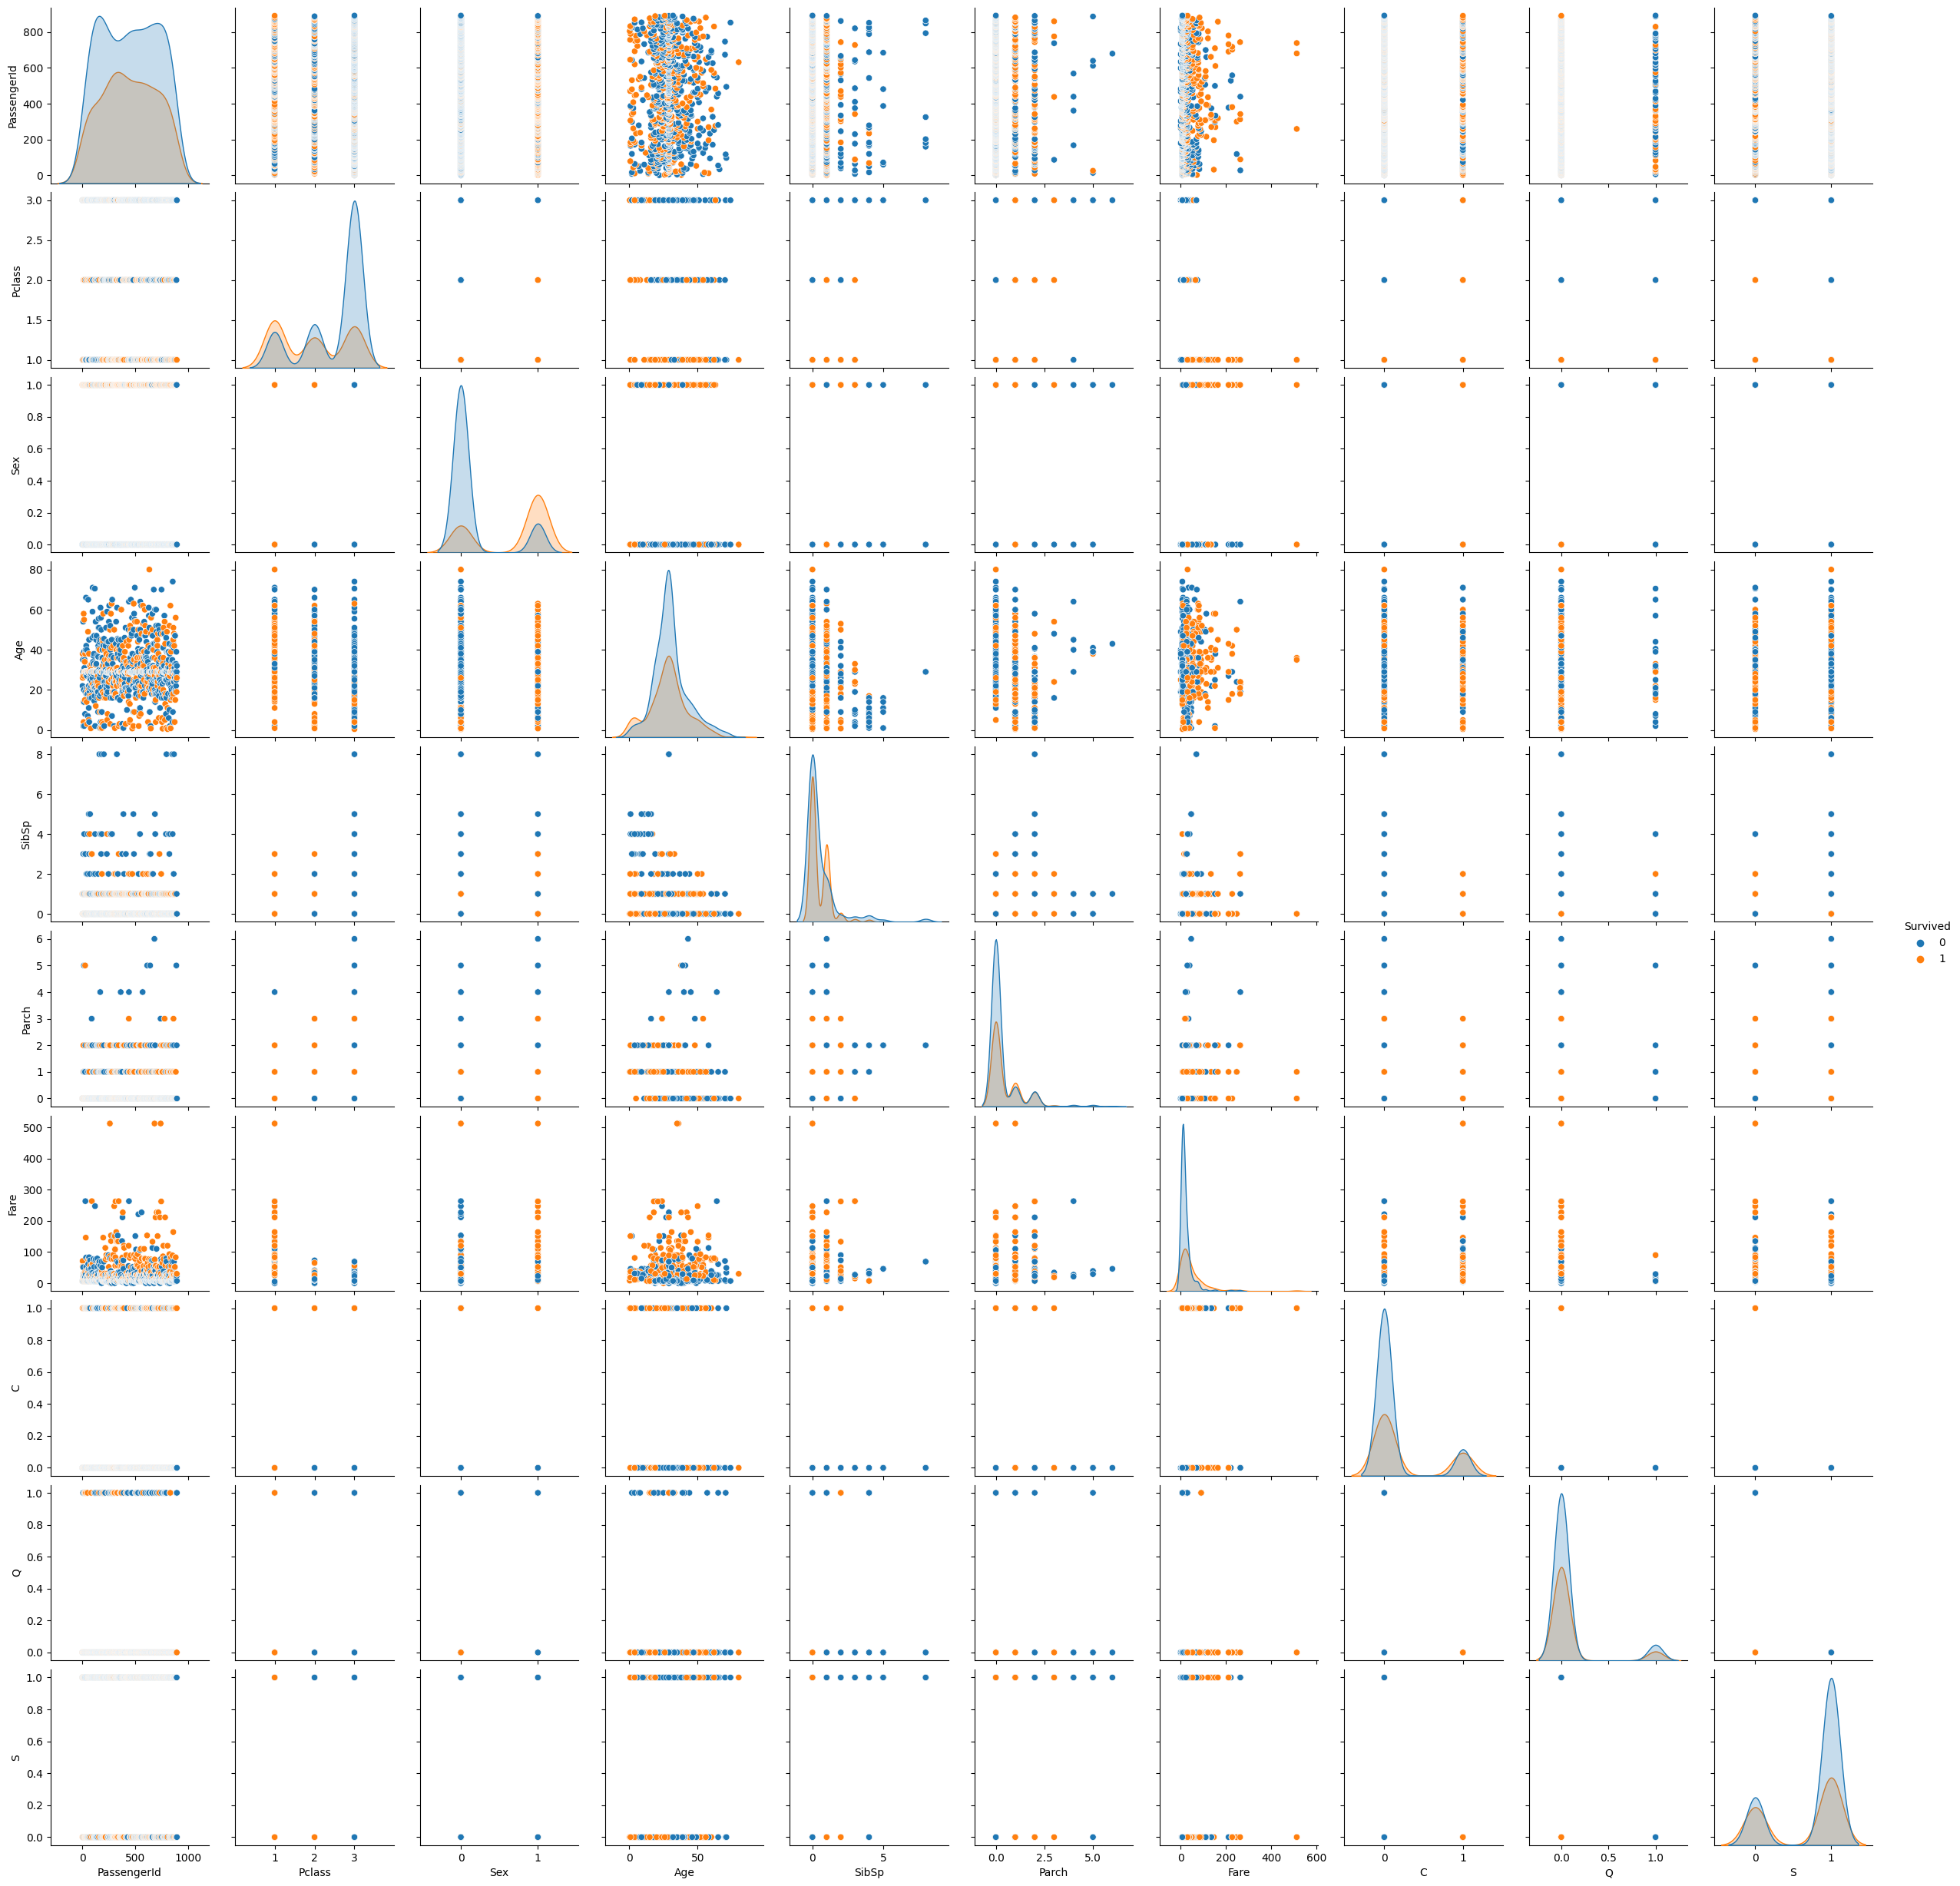

In [37]:
sns.pairplot(train,hue='Survived')
plt.show()

# We have clean data let's begin to random_forest classification.

In [38]:
X_train = train.drop(["Survived"],axis=1)
y_train = train["Survived"]
X_test = test

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier()

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score #kendi train/test splitimiz olsaydı bununla accuracy kontrol edecektik

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
Rf_sub = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived':y_pred })
Rf_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [45]:
Rf_sub.to_csv("Random_forest_sub1.csv")

Random_forests_score was 0.76794

# logistic regression  

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model2 = LogisticRegression(max_iter=1000)

In [48]:
model2.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred2 = model2.predict(X_test)

In [50]:
y_pred2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
Lr_sub = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived':y_pred2 })
Lr_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
Lr_sub.to_csv("logistic_regression_sub1.csv")

# let's try xgboost

In [53]:
from xgboost import XGBClassifier

In [54]:
model3 = XGBClassifier()

In [55]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [56]:
y_pred3 = model.predict(X_test)

In [57]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
XG_sub = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived':y_pred3 })
XG_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [59]:
XG_sub.to_csv("XGboost_sub1.csv")